# Bonus Part: Augmented Dimension

To run this Bonus notebook, you need to run the main project notebook, so that the database can be created and connected to. This notebook adds a table to that database.

## Data description

For our augmented dimension, we decided to take a dataset from the Bureau of Transportation Statistics website (http://www.rita.dot.gov/bts/sites/rita.dot.gov.bts/files/publications/commodity_flow_survey/2012/united_states/table10b). The CSV file compares, among others, the aggregate tons and aggregate value of goods per industry between 2007 and 2012 (The Commodity Flow Survey is done every 5 years).

In [1]:
!wget https://raw.githubusercontent.com/xinyicoco/ISTM_6212/master/Final%20Project/NAICS_comparison.csv

--2016-12-09 01:59:28--  https://raw.githubusercontent.com/xinyicoco/ISTM_6212/master/Final%20Project/NAICS_comparison.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7103 (6.9K) [text/plain]
Saving to: ‘NAICS_comparison.csv’

NAICS_comparison.cs 100%[=====================>]   6.94K  --.-KB/s   in 0s     

2016-12-09 01:59:28 (115 MB/s) - ‘NAICS_comparison.csv’ saved [7103/7103]



There were a few things that we had to clean from the dataset. First, negative values for percentage were encoded with a symbol that was not in standard encoding and we had to replace it with a standard '-'. Also, Any numbers that were higher than 999 were encoded as a string with a comma in it, so we had to delete the quotes and the commas. We had to do this for all columns using Trifacta. Below is a screenshot of the Trifacta Wrangler code used to achieve this.

In [2]:
!wget https://raw.githubusercontent.com/xinyicoco/ISTM_6212/master/Final%20Project/comparison_wrangle_script.PNG

--2016-12-09 01:59:28--  https://raw.githubusercontent.com/xinyicoco/ISTM_6212/master/Final%20Project/comparison_wrangle_script.PNG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122258 (119K) [image/png]
Saving to: ‘comparison_wrangle_script.PNG’

comparison_wrangle_ 100%[=====================>] 119.39K  --.-KB/s   in 0.005s 

2016-12-09 01:59:28 (24.1 MB/s) - ‘comparison_wrangle_script.PNG’ saved [122258/122258]



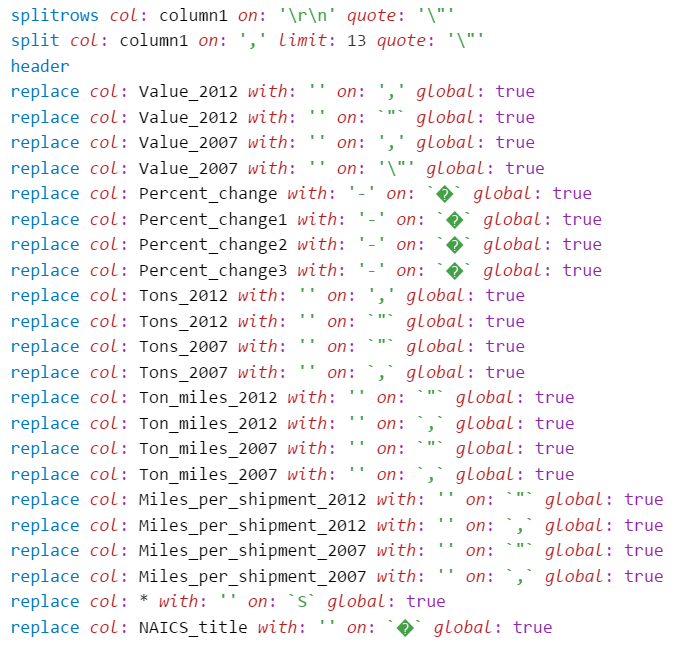

In [3]:
from IPython.display import Image
Image("comparison_wrangle_script.PNG", width = 600)

Then we took a look at all of our columns. This dataset is much smaller than our main Commodity Flow Survey, and thankfully just like it it has no null values.

In [4]:
!csvstat NAICS_comparison.csv

  1. NAICS_code
	<class 'int'>
	Nulls: False
	Min: 42
	Max: 551114
	Sum: 695375
	Mean: 14486.979166666666
	Median: 423.5
	Standard Deviation: 78543.24904378309
	Unique values: 48
  2. NAICS_title
	<class 'str'>
	Nulls: False
	Unique values: 47
	5 most frequent values:
		"Merchant wholesalers:	2
		Grocery and related product merchant wholesalers:	1
		"Beer:	1
		"Apparel:	1
		Motor vehicle and motor vehicle parts and supplies merchant wholesalers:	1
	Max length: 71
  3. Value_2012
	<class 'str'>
	Nulls: False
	Unique values: 48
	Max length: 68
  4. Value_2007
	<class 'str'>
	Nulls: False
	Unique values: 48
	Max length: 57
  5. Percent_change
	<class 'str'>
	Nulls: False
	Unique values: 47
	5 most frequent values:
		10.1:	2
		-20.9:	1
		29.4:	1
		and directory publishers """:	1
		-23.9:	1
	Max length: 28
  6. Tons_2012
	<class 'float'>
	Nulls: False
	Min: 5.0
	Max: 3780403.0
	Sum: 15984862.9
	Mean: 333017.97708333336
	Median: 98438.5
	Standard Deviation: 698100.4921254608
	Unique values: 

## <br> Add augmented dimension to database

Connect to the projfinal database which has already been created after running the main notebook

In [5]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [7]:
%sql postgresql://dbuser@localhost:5432/projfinal

'Connected: dbuser@projfinal'

In [16]:
%%sql
DROP TABLE IF EXISTS NAICS_comparison;
CREATE TABLE NAICS_comparison (
    NAICS_code INTEGER,
    NAICS_title VARCHAR(100),
    Value_2012 INTEGER,
    Value_2007 INTEGER,
    Percent_change_value NUMERIC,
    Tons_2012 INTEGER,
    Tons_2007 INTEGER,
    Percent_change_tons NUMERIC,
    Ton_miles_2012 INTEGER,
    Ton_miles_2007 INTEGER,
    Percent_change_ton_miles NUMERIC,
    Average_miles_per_shipment_2012 INTEGER,
    Average_miles_per_shipment_2007 NUMERIC,
    Percent_change_avh_miles NUMERIC
);

Done.
Done.


[]

In [21]:
!pwd

/home/jovyan/work


In [23]:
%%sql
COPY NAICS_comparison FROM '/home/jovyan/work/NAICS_comparison.csv'
CSV
HEADER
DELIMITER ','; 

48 rows affected.


[]

In [24]:
%%sql
SELECT * FROM NAICS_comparison LIMIT 5;

5 rows affected.


naics_code,naics_title,value_2012,value_2007,percent_change_value,tons_2012,tons_2007,percent_change_tons,ton_miles_2012,ton_miles_2007,percent_change_ton_miles,average_miles_per_shipment_2012,average_miles_per_shipment_2007,percent_change_avh_miles
212,Mining (except oil and gas),99888,85730,16.5,2900863,3638118,-20.3,859267,1057505,-18.7,47,53,-11.1
311,Food manufacturing,744573,585676,27.1,545892,568950,-4.1,261169,264425,-1.2,239,305,-21.6
312,Beverage and tobacco product manufacturing,142936,129804,10.1,159843,143530,11.4,49408,42063,17.5,292,227,28.3
313,Textile mills,30328,35936,-15.6,7101,8989,-21,3731,4133,-9.7,765,811,-5.6
314,Textile product mills,21595,28448,-24.1,5096,7022,-27.4,2313,3131,-26.1,918,854,7.6


In [25]:
%%sql
ALTER TABLE NAICS_comparison
ADD PRIMARY KEY(NAICS_code)

Done.


[]

In [26]:
%%sql
ALTER TABLE industry_classification
ADD FOREIGN KEY (industry_id) REFERENCES NAICS_comparison(naics_code);

Done.


[]

In [28]:
%%sql
ALTER TABLE shipment_dimension
ADD FOREIGN KEY (naics) REFERENCES NAICS_comparison(naics_code);

Done.


[]

Our augmented dimension lets us view our data in another light. For example we can now look at not only the value of value or weight in 2012, but the change from 2007. Below are two plots that do exactly this. The first looks at aggregate values and the second looks at the change in aggregate value.

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc

In [62]:
%%sql
SELECT NAICS_code, NAICS_title, Value_2007, Value_2012, percent_change_value, COUNT (shipmt_id) as count_2012
FROM industry_classification, cf_fact, NAICS_comparison, shipment_dimension
WHERE cf_fact.shipment_key = shipment_dimension.shipment_key
AND shipment_dimension.naics = industry_classification.industry_id
AND industry_classification.industry_id = NAICS_comparison.NAICS_code
GROUP BY industry_descr, naics_code
ORDER BY count_2012 DESC
;

45 rows affected.


naics_code,naics_title,value_2007,value_2012,percent_change_value,count_2012
325,Chemical manufacturing,713674,785839,10.1,48896
332,Fabricated metal product manufacturing,338290,333287,-1.5,46241
4238,"Machinery, equipment, and supplies merchant wholesalers",363108,433454,19.4,43675
311,Food manufacturing,585676,744573,27.1,40987
4244,Grocery and related product merchant wholesalers,567732,647284,14,38865
326,Plastics and rubber products manufacturing,209268,216973,3.7,33471
333,Machinery manufacturing,343262,402610,17.3,32369
212,Mining (except oil and gas),85730,99888,16.5,31112
323,Printing and related support activities,98848,79263,-19.8,30803
4236,Electrical and electronic goods merchant wholesalers,338597,450951,33.2,30205


From the above analysis, we could have a direct look of the values of total shipments for both year 2007 and 2012. The top two industries are Chemical manufacturing and Fabricated metal product manufacturing. For each of the industry, it have 48896 and 46241 shipments relatively in 2012.

In [63]:
data = _.DataFrame()

In [64]:
values = data.as_matrix()

In [65]:
names = [name.strip('"').strip() for name in data.naics_title]

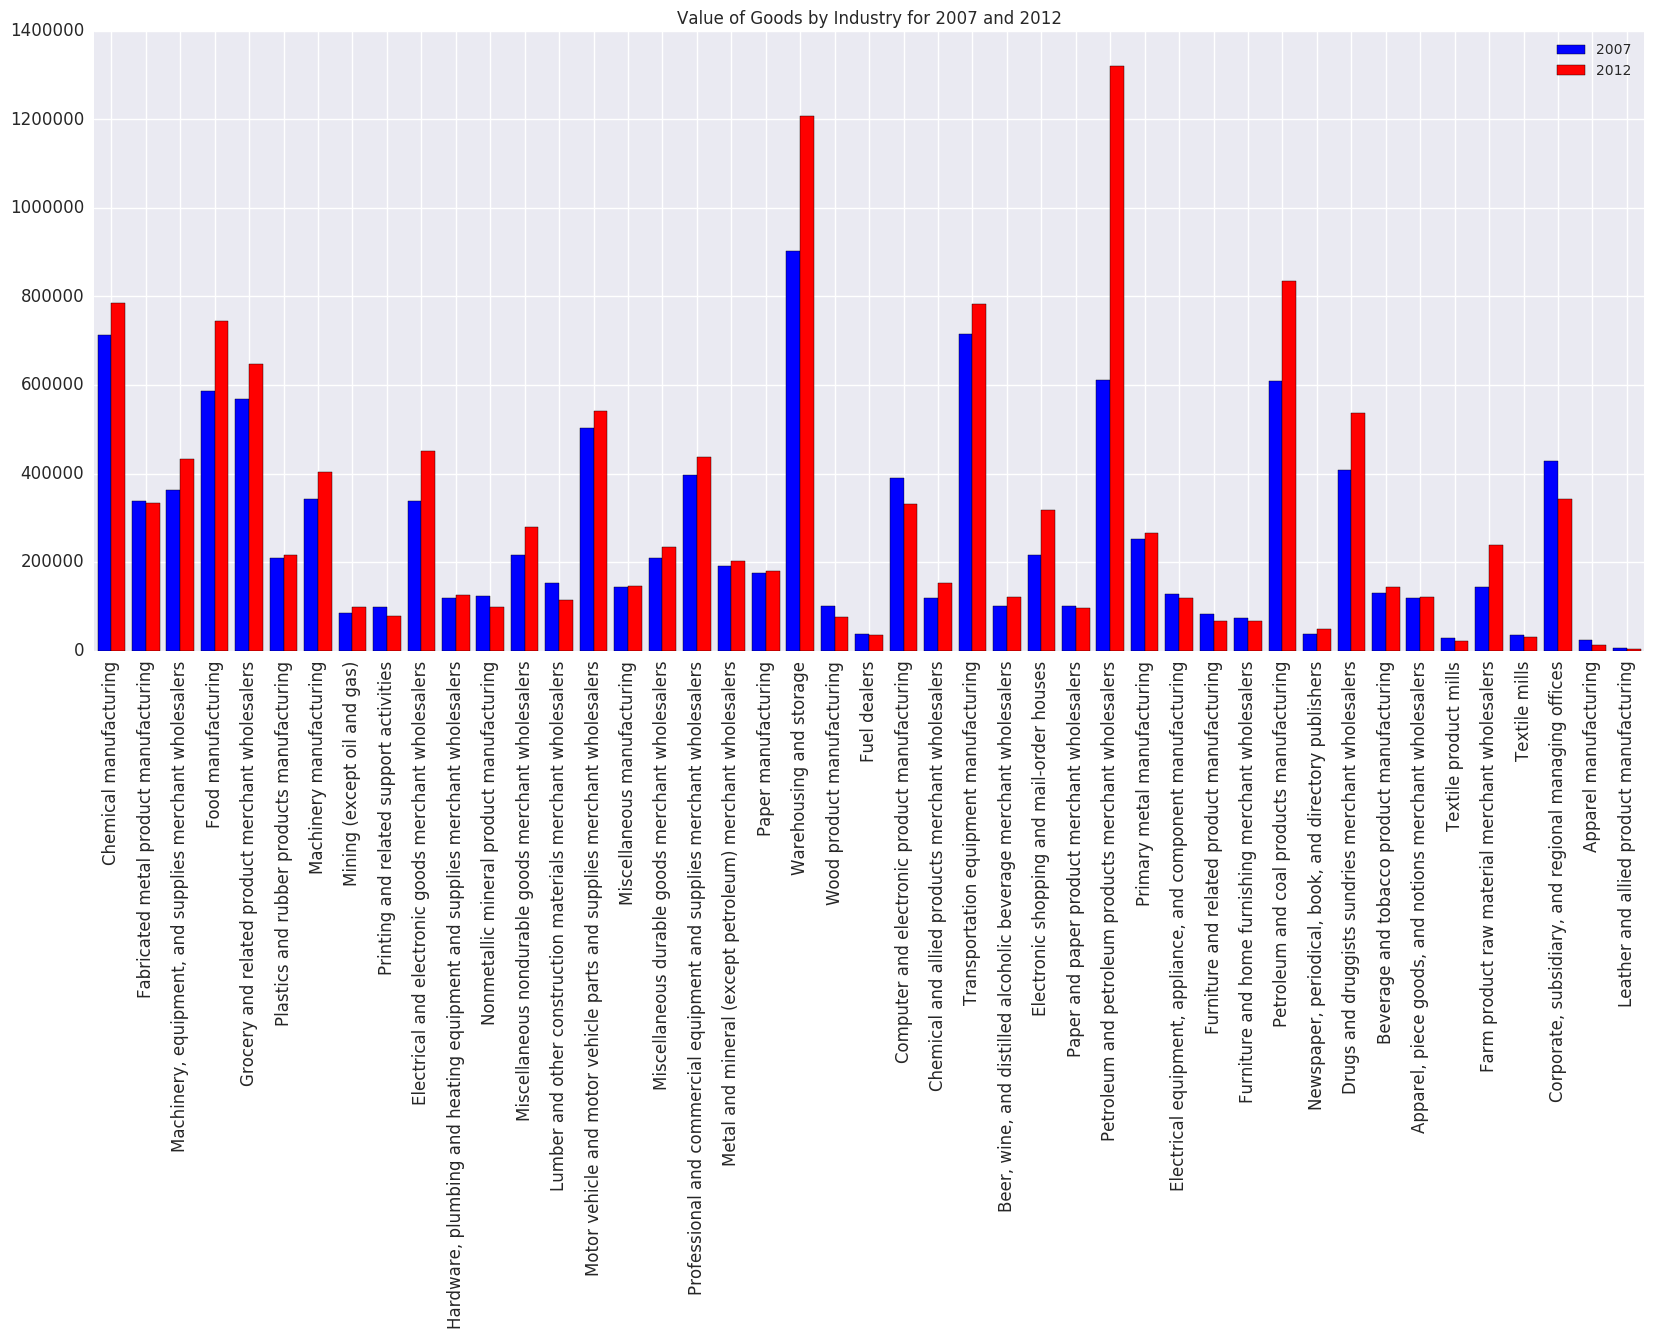

In [66]:
pos = np.arange(len(values))+0.5

ax = plt.subplot(111)
ax.bar(pos - 0.2, height = values[:,2], width = 0.4, align = 'center', color='blue',label='2007')
ax.bar(pos + 0.2, height = values[:,3], width = 0.4, align = 'center',color='red',label='2012')
ax.legend(loc=1)
ax.tick_params(labelsize = 12)
plt.xticks(pos, [industry for industry in names], rotation = 90)
plt.title('Value of Goods by Industry for 2007 and 2012')
plt.xlim([0,45])
plt.show()

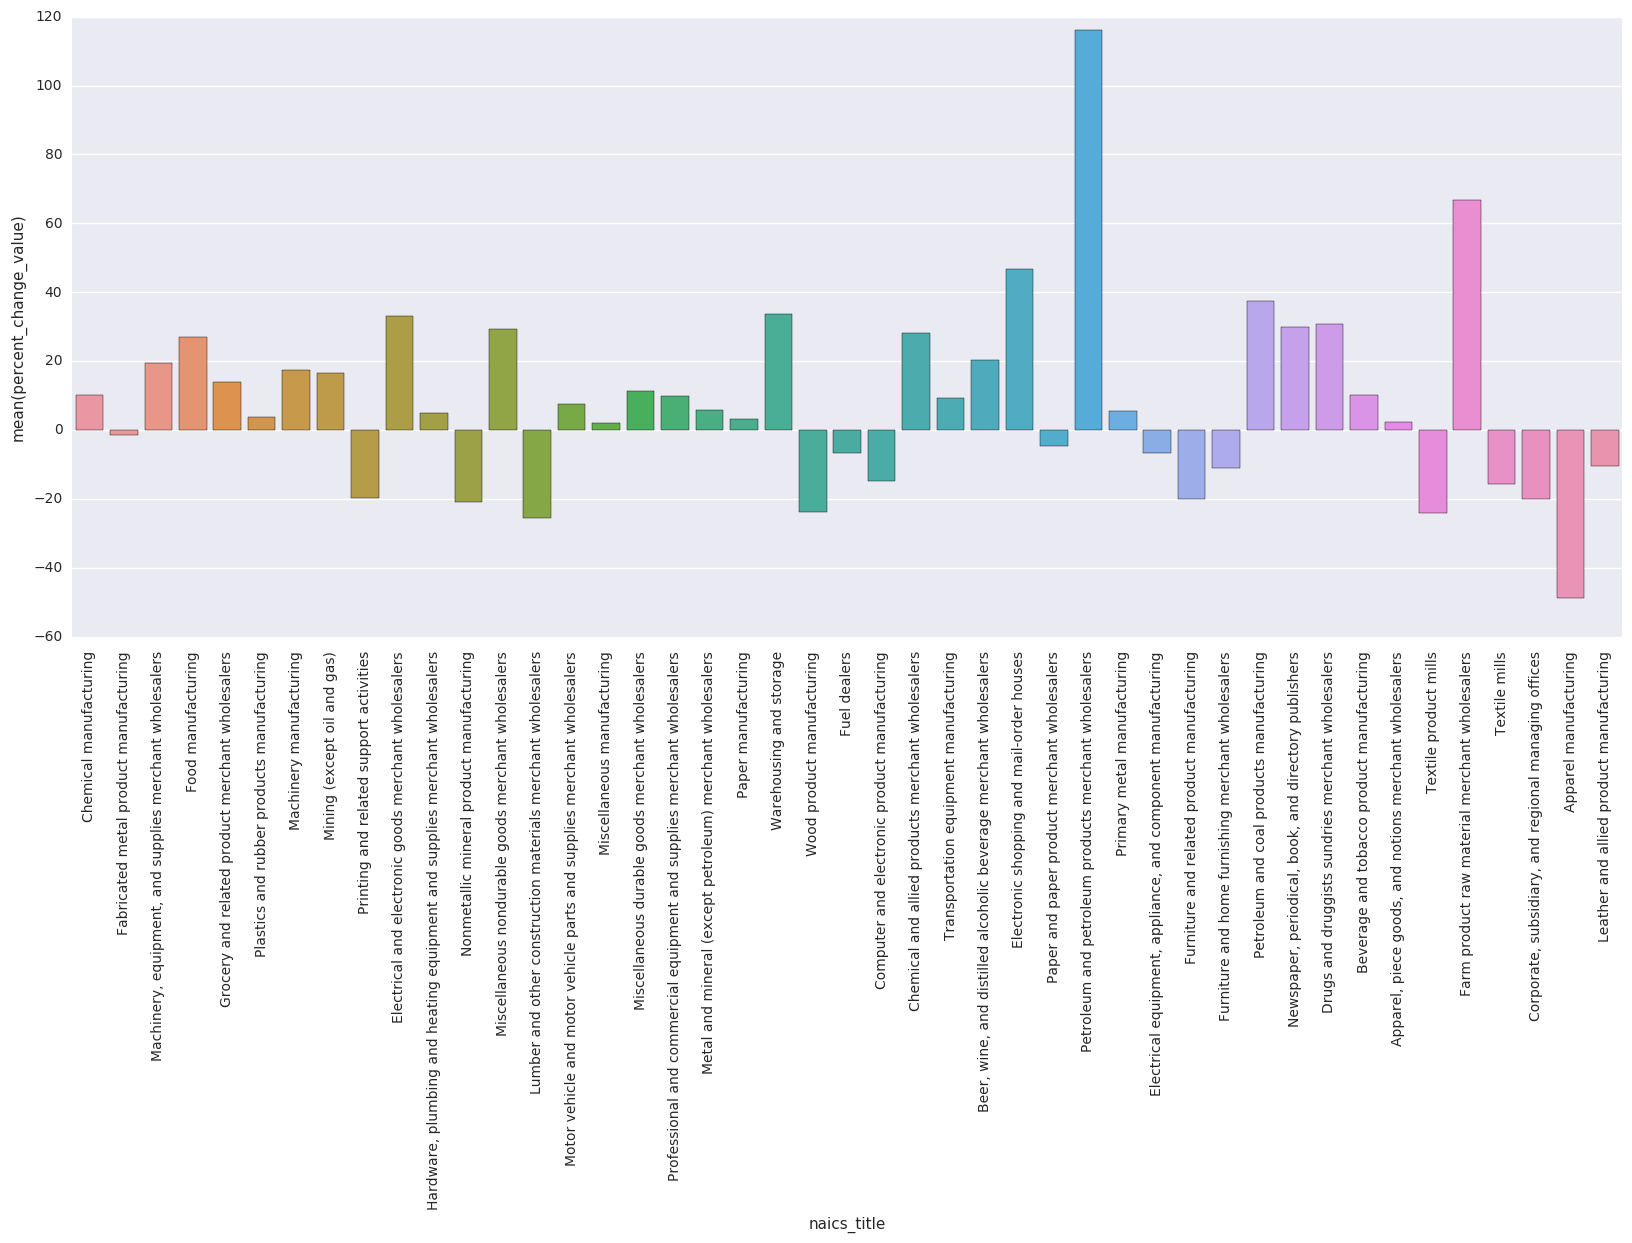

In [67]:
rc('figure', figsize=(20, 8))
splt = sns.barplot(x='naics_title', y='percent_change_value', data=data)
labels = [l for l in splt.get_xmajorticklabels()]
splt.set_xticklabels(labels, rotation=90)

<br><br><br><br><br>We hypothesized that the industries that had the highest count in 2012 would be well-established industries. This would mean that we would not see a lot of fluctuation in the value of the goods that (positive or negative). So we create the scatter plot below to test this.

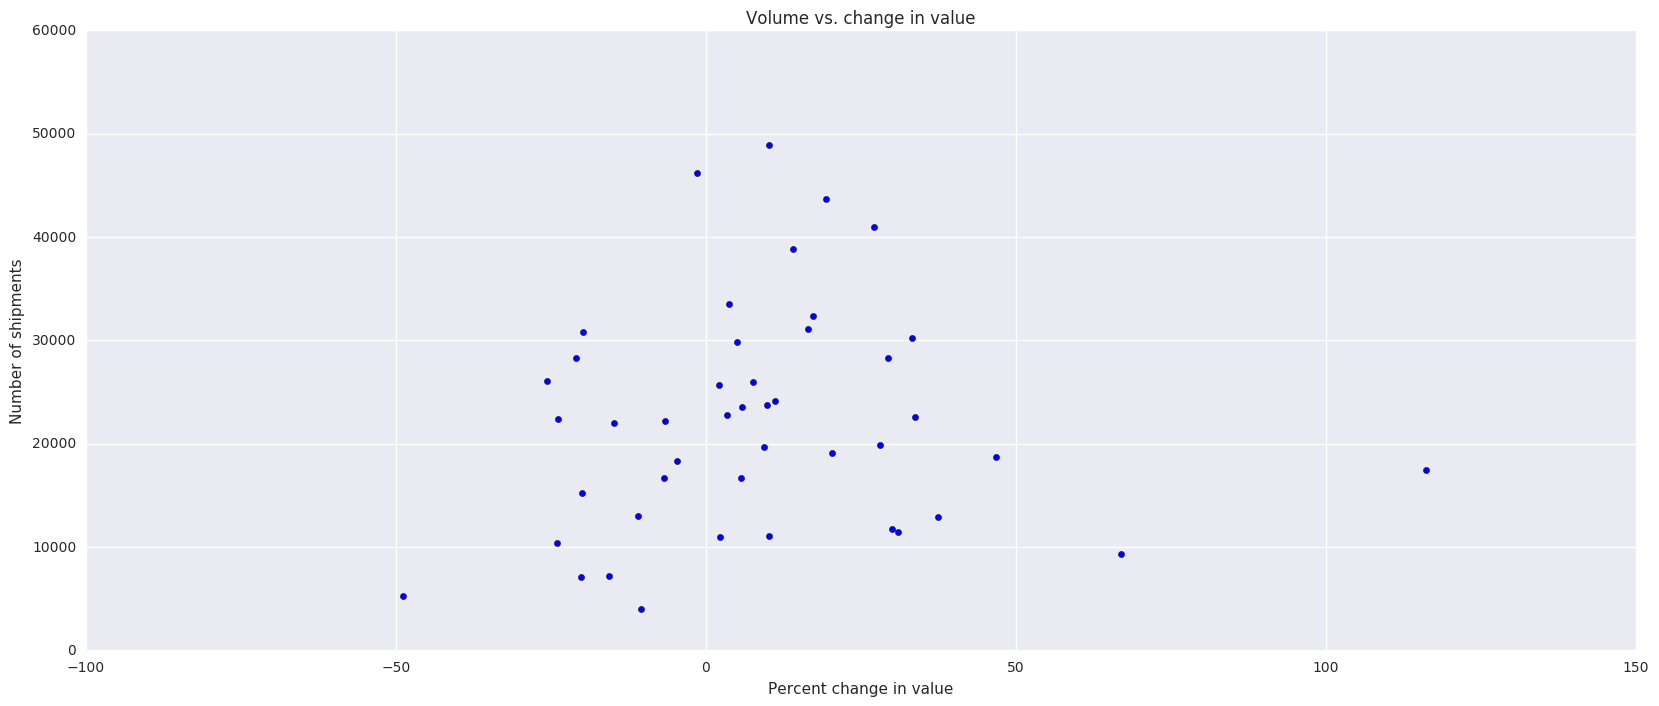

In [68]:
plt.scatter(data.percent_change_value, data.count_2012)
plt.xlabel('Percent change in value')
plt.ylabel('Number of shipments')
plt.title('Volume vs. change in value')

In the plot above, it does seem that the higher the number of shipments, the closer the point is to the y-axis (at 0% percent change). This can be seen by the vaguely tent-shaped graph, with the most volatile industries seeing the least amount of transactions in 2012.